In [1]:
## Import Qiskit

In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import *

In [3]:
secretnumber = '101001'

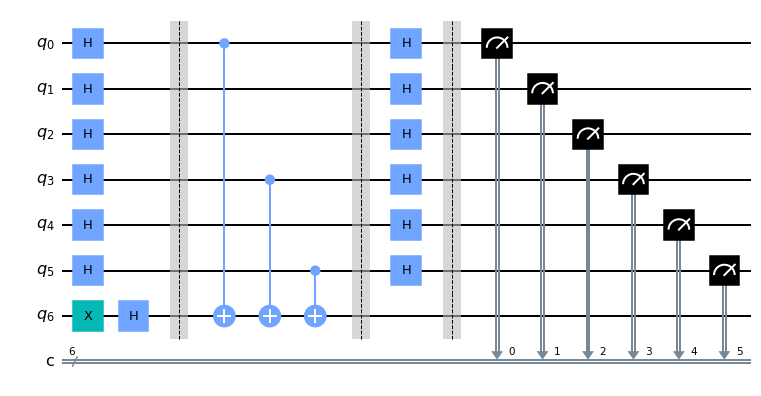

In [5]:
n = len(secretnumber) # lenght of the secret number

# circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(n+1, n)

# circuit.h([0,1,2,3,4,5])
circuit.h(range(n))
# circuit.x(6)
circuit.x(n)
# circuit.h(6)
circuit.h(n)
circuit.barrier()

"""
# check if 5th bit is 1
circuit.cx(5,6)
# to check if 3rd bit is 1`
circuit.cx(3,6)
# to chekc if oth bit is 1
circuit.cx(0,6)
"""
for idx, value in enumerate(reversed(secretnumber)):
    if value == '1':
        circuit.cx(idx, n) # create super position with n'th qubit

circuit.barrier()

circuit.h(range(n))
circuit.barrier()

#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(n), range(n))

circuit.draw(output="mpl")

{'101001': 1024}


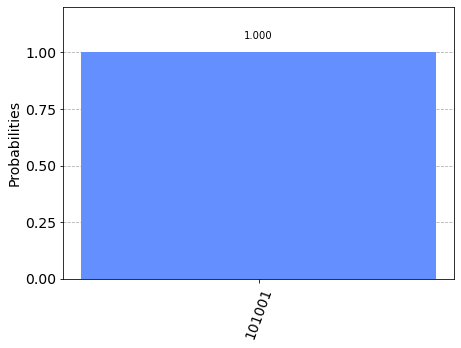

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)